# Import Packages

In [1]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt

%matplotlib inline

# Import python File

In [2]:
%load_ext autoreload
#using autoreload 1 to reload all modules imported by %aimport everytime before executing the python code typed .
%autoreload 2

%aimport lane_detection, car_detection, main

# Lane Detection Program

### Testing sobel filter

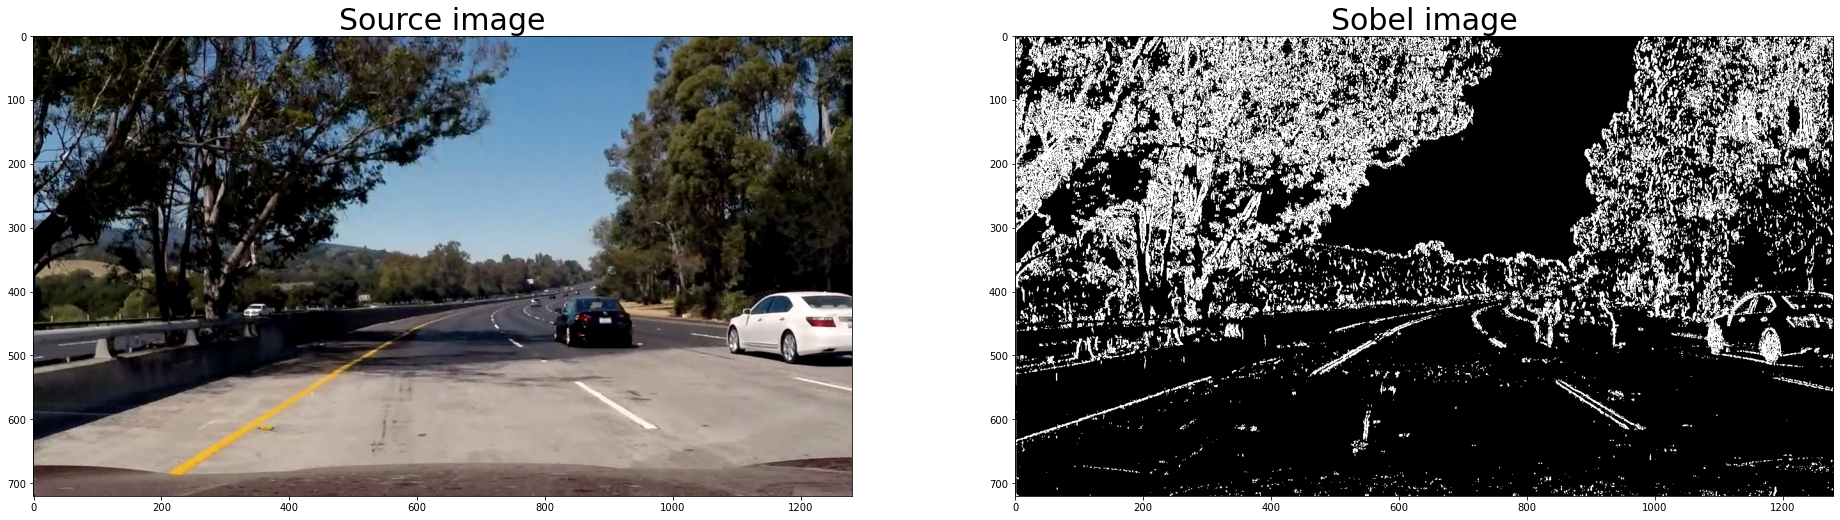

In [3]:
img = cv2.imread('./test_images/test5.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

sobel_img = lane_detection.abs_sobel_thresh(gray, thresh=(10, 200))

lane_detection.plt_images(img, 'Source image', sobel_img, 'Sobel image')

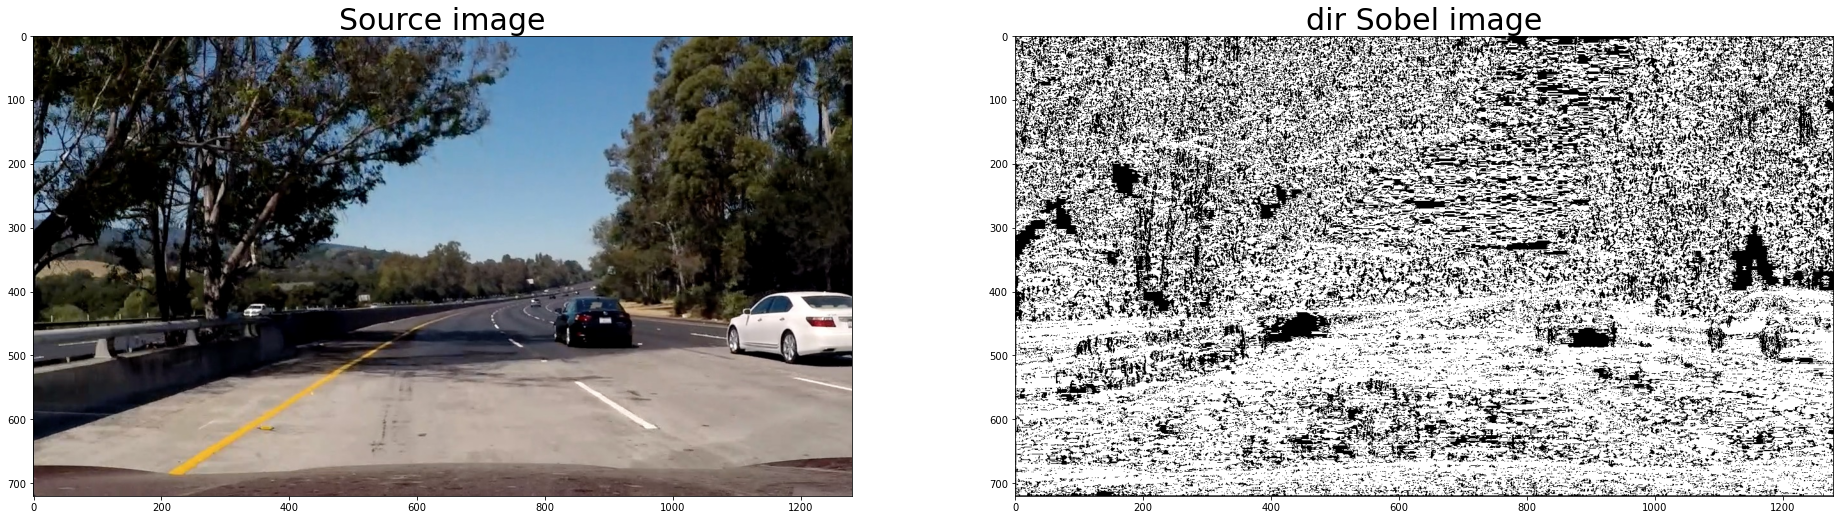

In [4]:
dir_binary = lane_detection.dir_threshold(gray, thresh=(np.pi/6, np.pi/2))

lane_detection.plt_images(img, 'Source image', dir_binary, 'dir Sobel image')

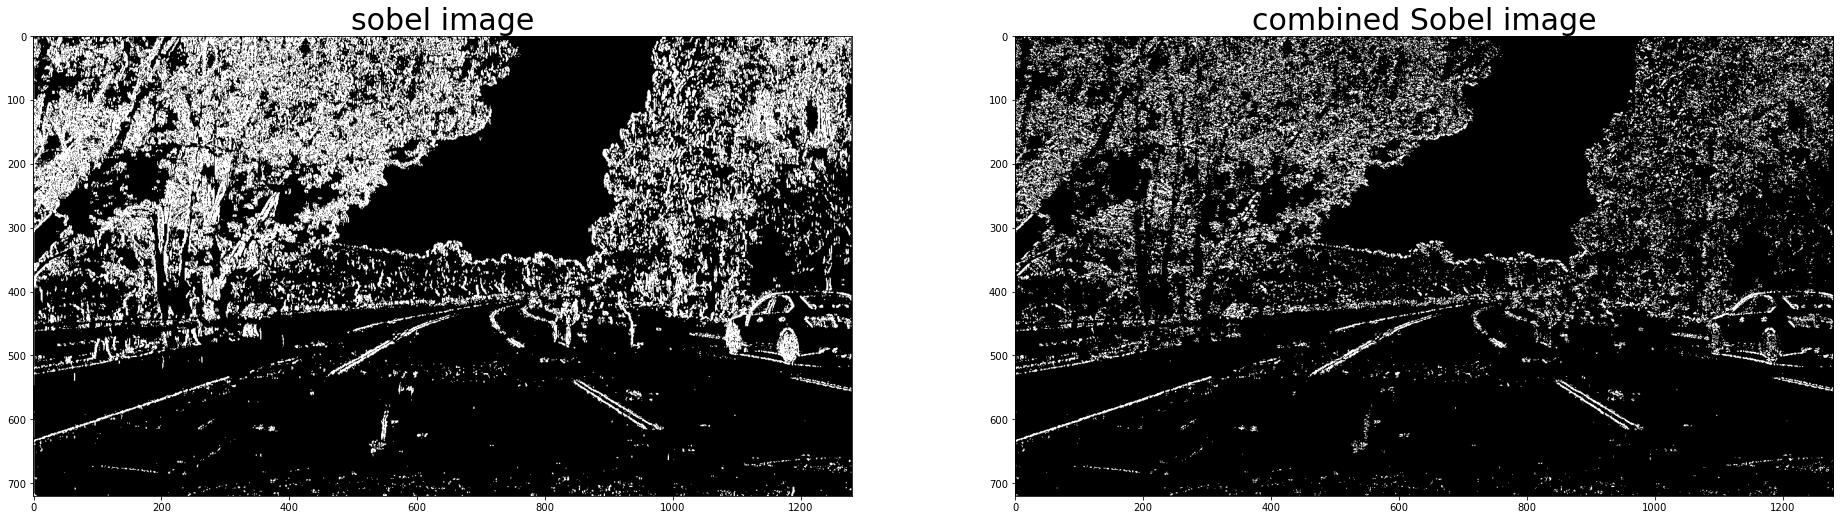

In [5]:
combined = ((sobel_img == 1) & (dir_binary == 1))
lane_detection.plt_images(sobel_img, 'sobel image', combined, 'combined Sobel image')

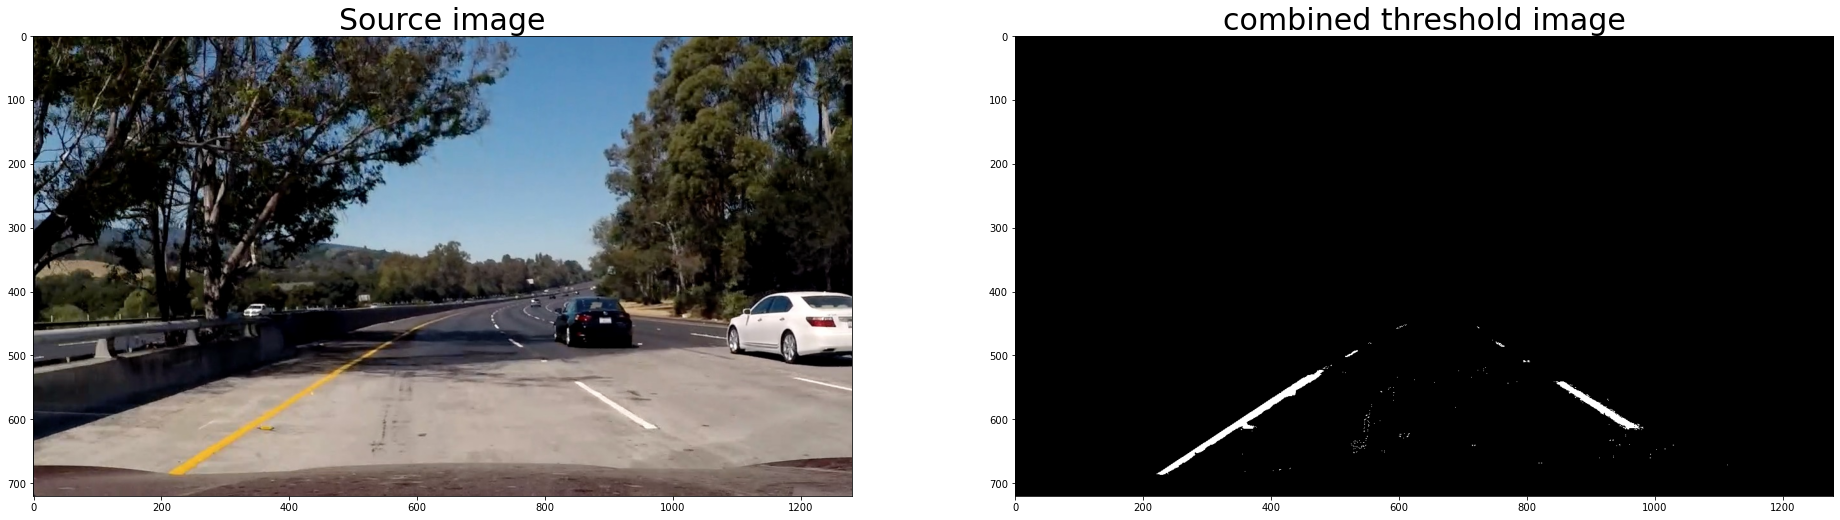

In [6]:
thresholded = lane_detection.combine_thresh(img,s_thresh=(100, 255), l_thresh=(120, 255))

lane_detection.plt_images(img, 'Source image', thresholded, 'combined threshold image')

### Testing perspective warp

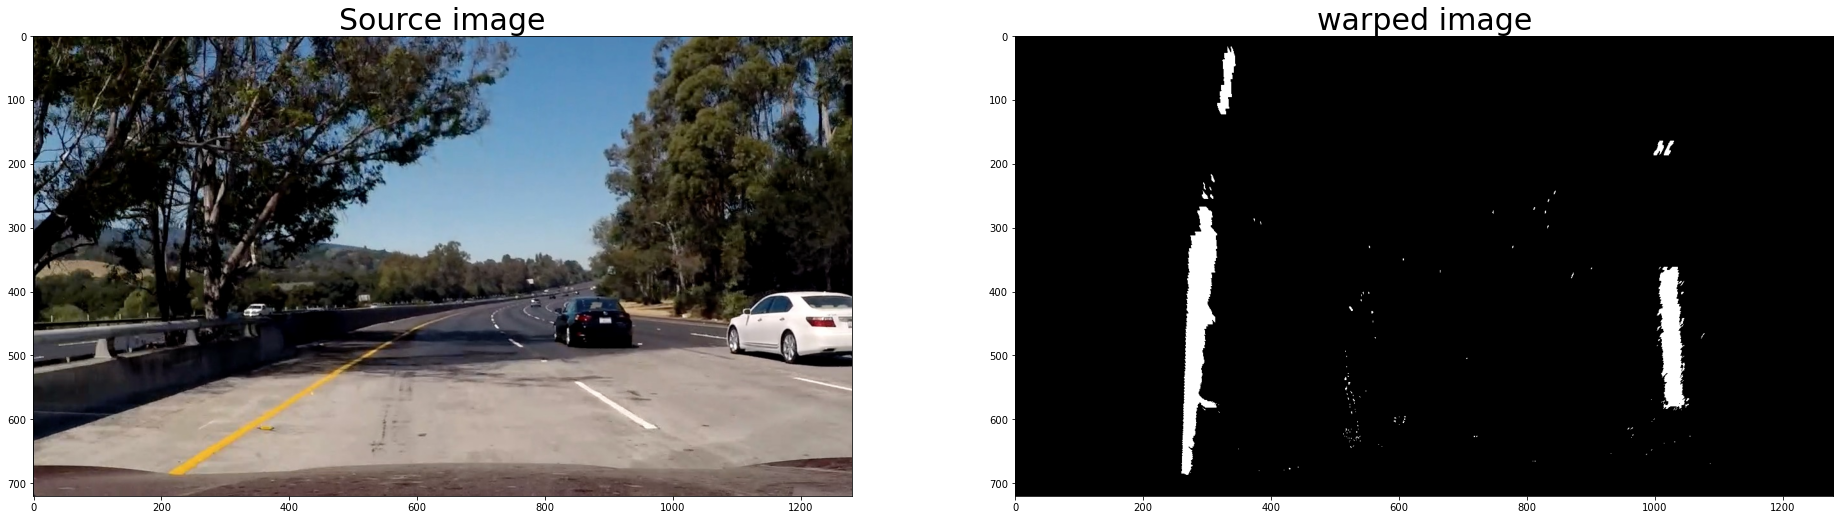

In [7]:
thresholded_img, warped_img, Minv = lane_detection.warp_image_to_birdseye_view_gray(img)

lane_detection.plt_images(img, 'Source image', warped_img, 'warped image')

### Testing sliding window

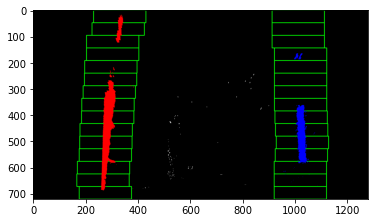

In [8]:
left_fit, right_fit,out_img, lefty, leftx, righty, rightx, ploty = lane_detection.fitlines(warped_img, nwindows=15, margin=100, minpix = 50 )
plt.imshow(out_img)

### Testing vehicle position and radius of curvature

In [9]:
center,left_curverad, right_curverad = lane_detection.lane_curvatures(img, lefty, leftx, righty, rightx, ploty)
print(center)
print(left_curverad)
print(right_curverad)

0.29517596785131006
1570.288041098253
5567.9997606255565


### Testing of draw lanes

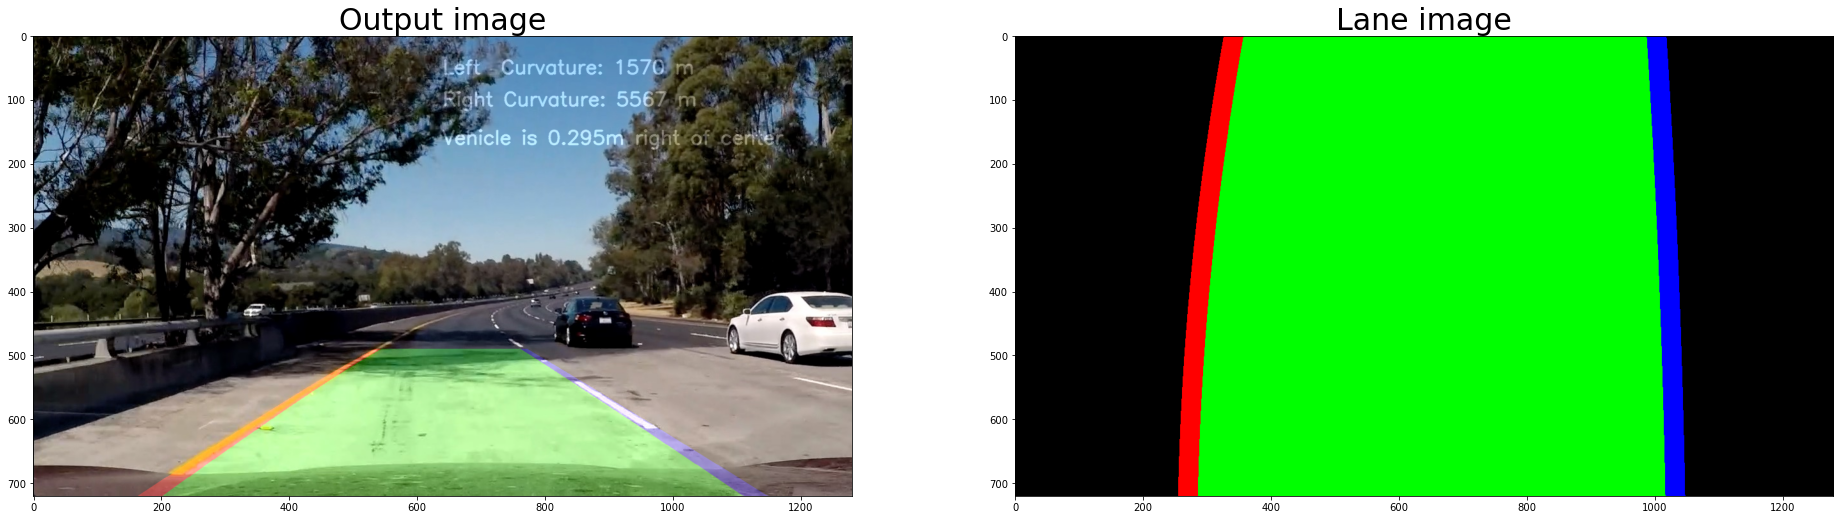

In [10]:
result,color_warp = lane_detection.draw_lane(img, warped_img, left_fit, right_fit, ploty, center, left_curverad, right_curverad, Minv)
lane_detection.plt_images(result, 'Output image', color_warp, 'Lane image')

### Testing laneDetection_pipeline_v1 function

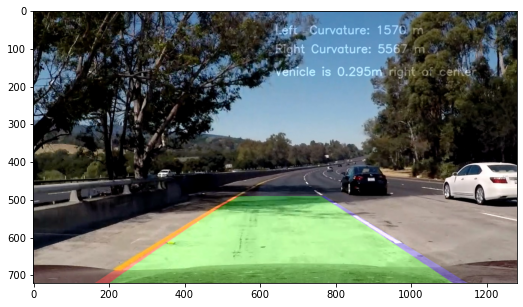

In [11]:
processed_img = lane_detection.laneDetection_pipeline_v1(img)
plt.figure(figsize=(10,5))
plt.imshow(processed_img)

### Testing laneDetection_pipeline_v2 function

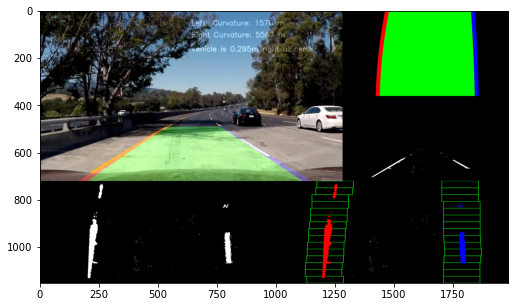

In [12]:
processed_img = lane_detection.laneDetection_pipeline_v2(img)
plt.figure(figsize=(10,5))
plt.imshow(processed_img)

# Car Detection Program

### Load yolo weights and layers

In [13]:
net = car_detection.getNet()

layers_name = car_detection.loadWeightsLayers(net)

print("yolo weights and layers are loaded.")
print("Layer names: ", layers_name)

yolo weights and layers are loaded.
Layer names:  ['yolo_82', 'yolo_94', 'yolo_106']


### Run the interface on the test image

In [16]:
start_t = time.time()

layers_output = car_detection.netForwardOutput(img, net, layers_name)

print("Interface took: {}".format(time.time() - start_t))

Interface took: 0.5375621318817139


### Draw boxes on the detected car

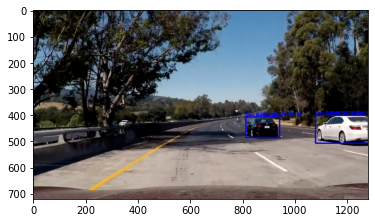

In [17]:
boxes = []
confidences = []
classIDs = []
idxs=[]

idxs, boxes, confidences = car_detection.getBoxes(layers_output, img)
img = car_detection.drawBoxes(idxs, boxes, confidences, img)

plt.imshow(img)

### Draw detected cars on the left

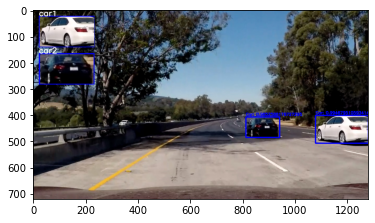

In [18]:
img = cv2.imread('./test_images/test5.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

boxes = []
confidences = []
classIDs = []
idxs=[]

idxs, boxes, confidences = car_detection.getBoxes(layers_output, img)
img = car_detection.draw_cars(idxs,boxes,img)
img = car_detection.drawBoxes(idxs, boxes, confidences, img)

plt.imshow(img)

# Testing whole Program

### Normal mode

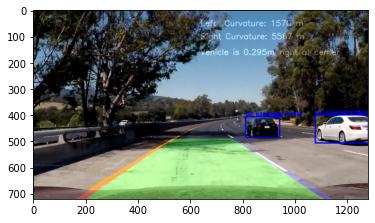

In [21]:
img = cv2.imread('./test_images/test5.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
processed_img_whole = main.pipeline_v1(img)
plt.imshow(processed_img_whole)

### Normal mode with draw cars

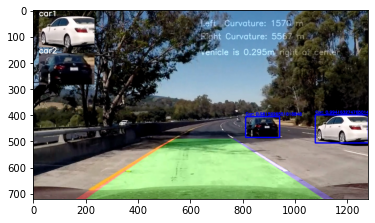

In [23]:
img = cv2.imread('./test_images/test5.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
processed_img_whole = main.pipeline_v2(img)
plt.imshow(processed_img_whole)

### Debug mode

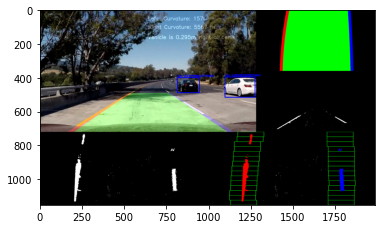

In [24]:
img = cv2.imread('./test_images/test5.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
processed_img_whole = main.pipeline_v3(img)
plt.imshow(processed_img_whole)

### Debug mode with draw cars

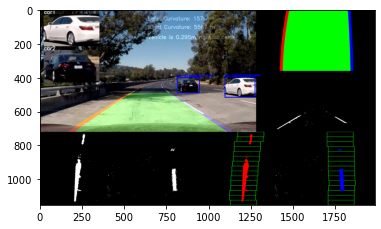

In [25]:
img = cv2.imread('./test_images/test5.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
processed_img_whole = main.pipeline_v4(img)
plt.imshow(processed_img_whole)

# Creating the output video

In [ ]:
main.createVideo("./test_videos/challenge_video.mp4","challenge_video_output.mp4")

In [ ]:
main.createVideo("./test_videos/challenge_video.mp4","challenge_video_output_draw_cars.mp4", "0", "1")

In [ ]:
main.createVideo("./test_videos/challenge_video.mp4","challenge_video_output_debug_mode.mp4", "1", "0")

In [ ]:
main.createVideo("./test_videos/challenge_video.mp4","challenge_video_output_debug_mode_draw_cars.mp4", "1", "1")

In [ ]:
main.createVideo("./test_videos/project_video.mp4","project_video_output.mp4")

In [ ]:
main.createVideo("./test_videos/project_video.mp4","project_video_output_draw_cars.mp4", "0", "1")

In [ ]:
main.createVideo("./test_videos/project_video.mp4","project_video_output_debug_mode.mp4", "1", "0")

In [ ]:
main.createVideo("./test_videos/project_video.mp4","project_video_output_debug_mode_draw_cars.mp4", "1", "1")